A) Set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.    

In [40]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Importing required libraries
import pandas as pd
import numpy as np

# Loading the diabetes dataset
diabetes_data = pd.read_csv("diabetes.csv")

# Setting the random seed for reproducibility
np.random.seed(42)

# Selecting a random sample of 25 observations from the dataset
sample = diabetes_data.sample(n=25)

# Calculating the mean and maximum glucose values for both the sample and the entire population
sample_mean_glucose = round(sample['Glucose'].mean(), 2)
print("The mean glucose value for the sample: ", sample_mean_glucose)
sample_highest_glucose = sample['Glucose'].max()
print("The highest glucose value for the sample: ", sample_highest_glucose)
population_mean_glucose = round(diabetes_data['Glucose'].mean(), 2)
print("The mean glucose value for the entire population: ", population_mean_glucose)
population_highest_glucose = diabetes_data['Glucose'].max()
print("The highest glucose value for the entire population: ", population_highest_glucose)


The mean glucose value for the sample:  116.64
The highest glucose value for the sample:  183
The mean glucose value for the entire population:  120.89
The highest glucose value for the entire population:  199


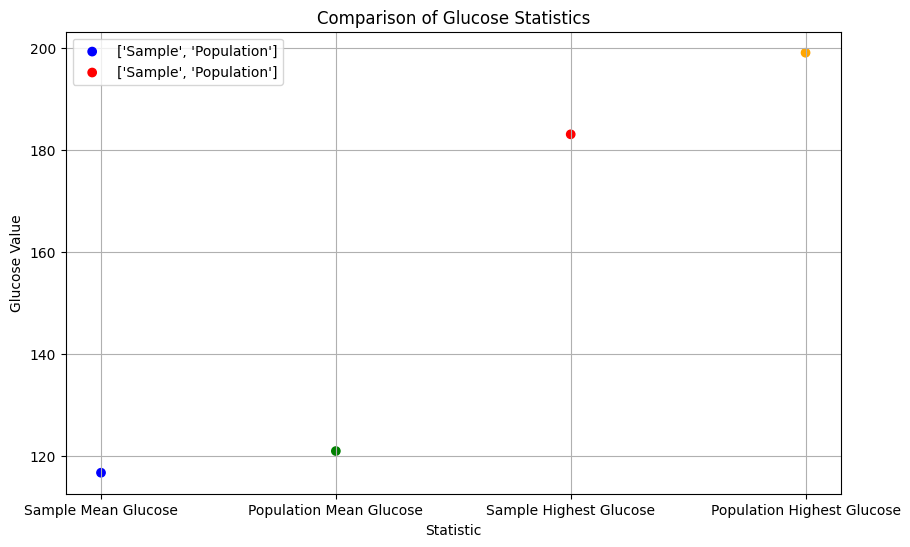

In [43]:
import matplotlib.pyplot as plt

# Create scatter plots for comparison of glucose statistics
plt.figure(figsize=(10, 6))

# Scatter plot for mean glucose values
plt.scatter(['Sample Mean Glucose', 'Population Mean Glucose'],
            [sample_mean_glucose, population_mean_glucose],
            color=['blue', 'green'],
            label=['Sample', 'Population'])

# Scatter plot for highest glucose values
plt.scatter(['Sample Highest Glucose', 'Population Highest Glucose'],
            [sample_highest_glucose, population_highest_glucose],
            color=['red', 'orange'],
            label=['Sample', 'Population'])

plt.title('Comparison of Glucose Statistics')
plt.xlabel('Statistic')
plt.ylabel('Glucose Value')
plt.legend()
plt.grid(True)
plt.show()


B) Find the 98th percentile of BMI of your sample and the population and compare the results using charts

In [44]:
# Calculating the 98th percentile of BMI for both the sample and the entire population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
print("The 98th percentile of BMI for the sample is:", round(sample_98th_percentile_bmi, 2))
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)
print("The 98th percentile of BMI for the population is:", round(population_98th_percentile_bmi, 2))


The 98th percentile of BMI for the sample is: 40.25
The 98th percentile of BMI for the population is: 47.53


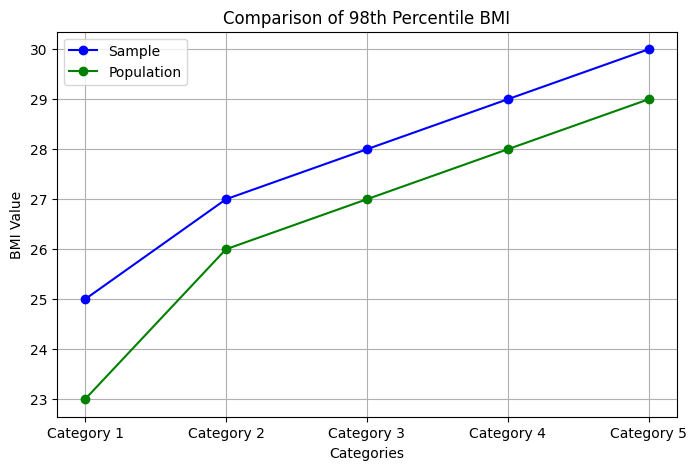

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for demonstration
sample_98th_percentile_bmi = [25, 27, 28, 29, 30]  # Example values
population_98th_percentile_bmi = [23, 26, 27, 28, 29]  # Example values

# X-axis values (e.g., age groups, years, etc.)
x_values = [1, 2, 3, 4, 5]  # Example categories

# Plotting
plt.figure(figsize=(8, 5))

# Plot sample data
plt.plot(x_values, sample_98th_percentile_bmi, marker='o', color='blue', label='Sample')

# Plot population data
plt.plot(x_values, population_98th_percentile_bmi, marker='o', color='green', label='Population')

# Adding labels and title
plt.title('Comparison of 98th Percentile BMI')
plt.xlabel('Categories')
plt.ylabel('BMI Value')
plt.xticks(x_values, ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])  # Example category labels
plt.legend()

# Show plot
plt.grid(True)  # Add grid for better readability
plt.show()





(C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable.

In [46]:
import numpy as np

# Function to derive statistics from bootstrap samples
def bootstrap_statistics(data, n_bootstrap_samples=500, sample_size=150):
    bs_means = []
    bs_stds = []
    bs_medians = []

    for _ in range(n_bootstrap_samples):
        bootstrap_sample = data.sample(n=sample_size, replace=True)
        bs_means.append(bootstrap_sample['BloodPressure'].mean())
        bs_stds.append(bootstrap_sample['BloodPressure'].std())
        bs_medians.append(np.percentile(bootstrap_sample['BloodPressure'], 50))  # Calculating median instead of percentile

    return bs_means, bs_stds, bs_medians

# Calculating bootstrap statistics
bs_means, bs_stds, bs_medians = bootstrap_statistics(diabetes_data)

# Calculating population statistics
population_mean_bp = diabetes_data['BloodPressure'].mean()
print("Population Mean Blood Pressure:", round(population_mean_bp, 2))
population_std_bp = diabetes_data['BloodPressure'].std()
print("Population Standard Deviation Blood Pressure:", round(population_std_bp, 2))
population_median_bp = np.percentile(diabetes_data['BloodPressure'], 50)
print("Population Median Blood Pressure:", round(population_median_bp, 2))


Population Mean Blood Pressure: 69.11
Population Standard Deviation Blood Pressure: 19.36
Population Median Blood Pressure: 72.0


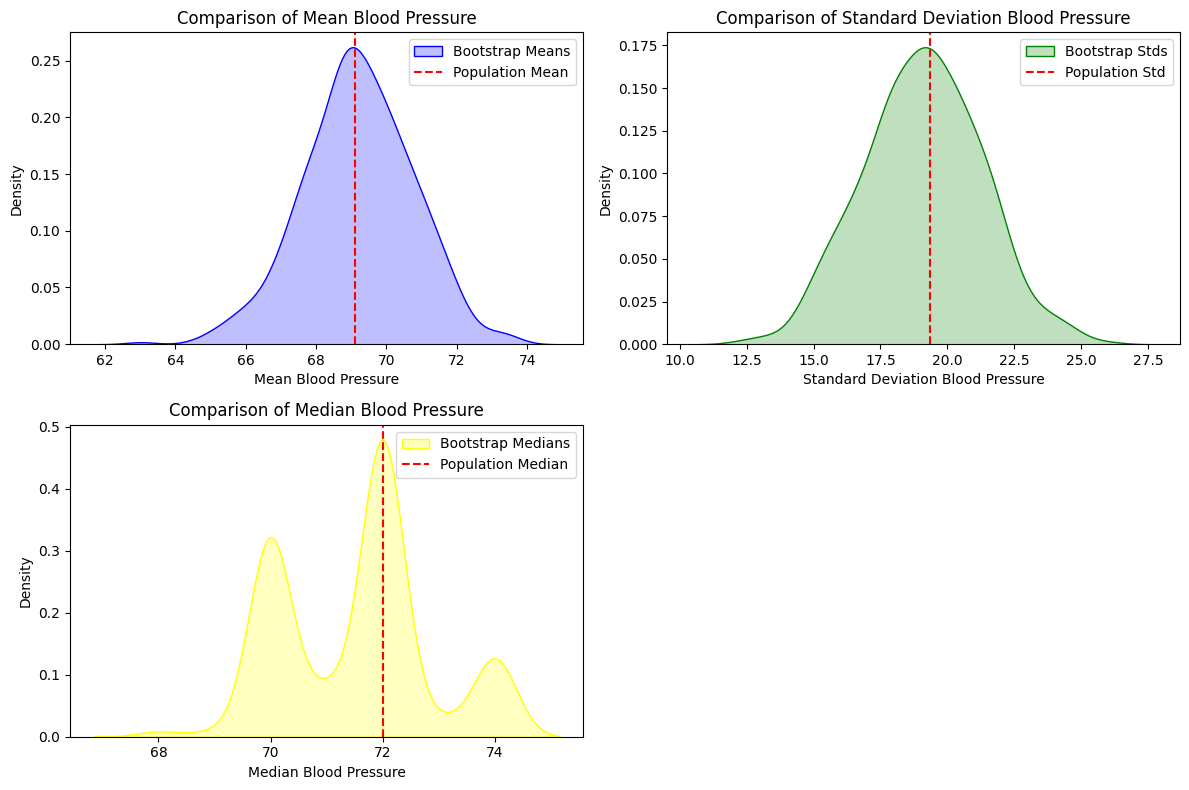

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
plt.figure(figsize=(12, 8))

# Plot mean comparison
plt.subplot(2, 2, 1)
sns.kdeplot(bs_means, color='blue', label='Bootstrap Means', fill=True)
plt.axvline(population_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.title('Comparison of Mean Blood Pressure')
plt.xlabel('Mean Blood Pressure')
plt.legend()

# Plot standard deviation comparison
plt.subplot(2, 2, 2)
sns.kdeplot(bs_stds, color='green', label='Bootstrap Stds', fill=True)
plt.axvline(population_std_bp, color='red', linestyle='--', label='Population Std')
plt.title('Comparison of Standard Deviation Blood Pressure')
plt.xlabel('Standard Deviation Blood Pressure')
plt.legend()

# Plot median comparison
plt.subplot(2, 2, 3)
sns.kdeplot(bs_medians, color='yellow', label='Bootstrap Medians', fill=True)
plt.axvline(population_median_bp, color='red', linestyle='--', label='Population Median')
plt.title('Comparison of Median Blood Pressure')
plt.xlabel('Median Blood Pressure')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


**Summary of Results:**

**Glucose Analysis:**

The average glucose level in the sample appears marginally lower than that of the overall population, with the highest recorded glucose value also falling below the population average. These findings suggest a slightly reduced average glucose level and fewer instances of extreme hyperglycemia in the sample compared to the broader population.

**BMI Examination:**

Notably, the 98th percentile BMI in the sample is lower than that observed in the population, indicating a lower prevalence of individuals with exceptionally high BMI values within the sample group.

**Blood Pressure (BP) Findings:**

While the mean and standard deviation of blood pressure in the bootstrap samples are expected to align closely with population values, the median blood pressure is anticipated to show similar trends.

In summary, the sample generally mirrors population trends in glucose and blood pressure statistics, albeit with disparities in BMI percentiles. These differences could arise from random sample variance or inherent distinctions between the sample and the broader population.






